In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [41]:
train_data = pd.read_csv('SalaryData_Train.csv')
test_data = pd.read_csv('SalaryData_Test.csv')

### EDA &  Data Preprocessing

In [42]:
train_data.shape

(2998, 14)

In [43]:
test_data.shape

(15060, 14)

In [44]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [45]:
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [46]:
train_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           1
dtype: int64

In [47]:
test_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [48]:
train_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [49]:
category_col =['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary'] 
for c in category_col:
    print (c)
    print (train_data[c].value_counts())
    print('\n')

workclass
 Private             2188
 Self-emp-not-inc     254
 Local-gov            216
 State-gov            131
 Self-emp-inc         120
 Federal-gov           88
 Without-pay            1
Name: workclass, dtype: int64


education
 HS-grad         979
 Some-college    650
 Bachelors       529
 Masters         168
 Assoc-voc       125
 11th            116
 Assoc-acdm       94
 10th             80
 Prof-school      57
 7th-8th          54
 9th              44
 Doctorate        30
 12th             28
 5th-6th          27
 1st-4th          13
 Preschool         4
Name: education, dtype: int64


maritalstatus
 Married-civ-spouse       1391
 Never-married             955
 Divorced                  421
 Widowed                    96
 Separated                  92
 Married-spouse-absent      40
 Married-AF-spouse           3
Name: maritalstatus, dtype: int64


occupation
 Exec-managerial      398
 Sales                397
 Prof-specialty       387
 Craft-repair         384
 Adm-clerical   

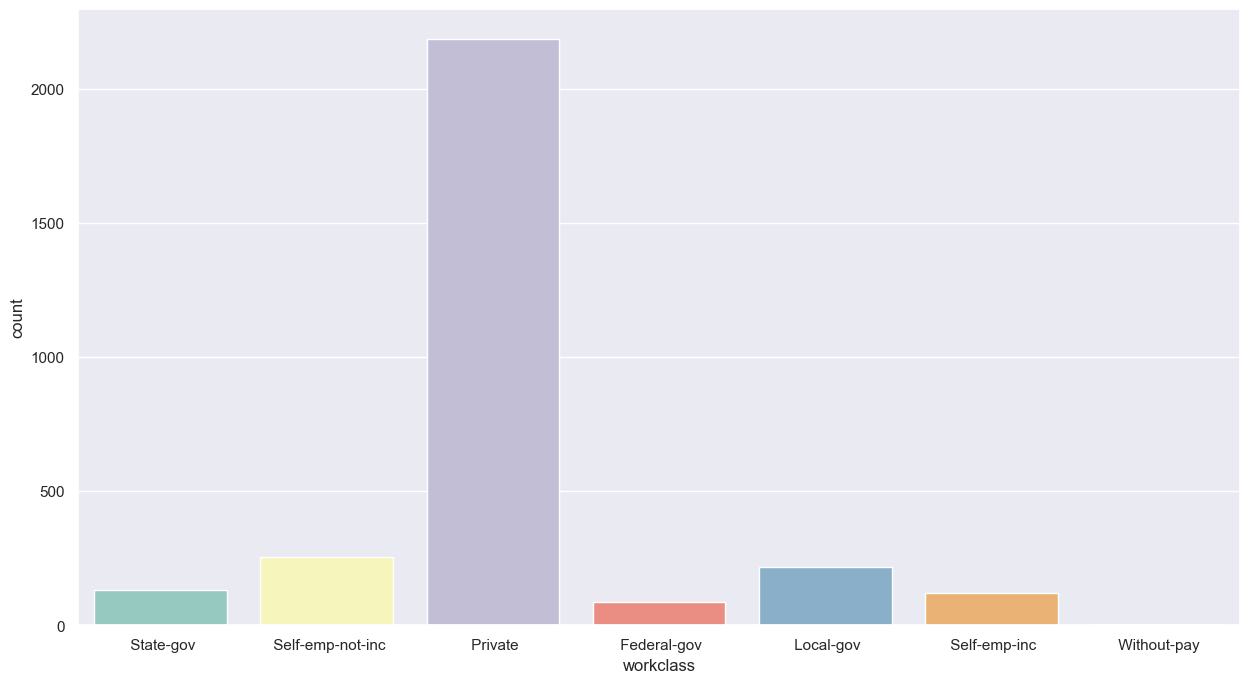

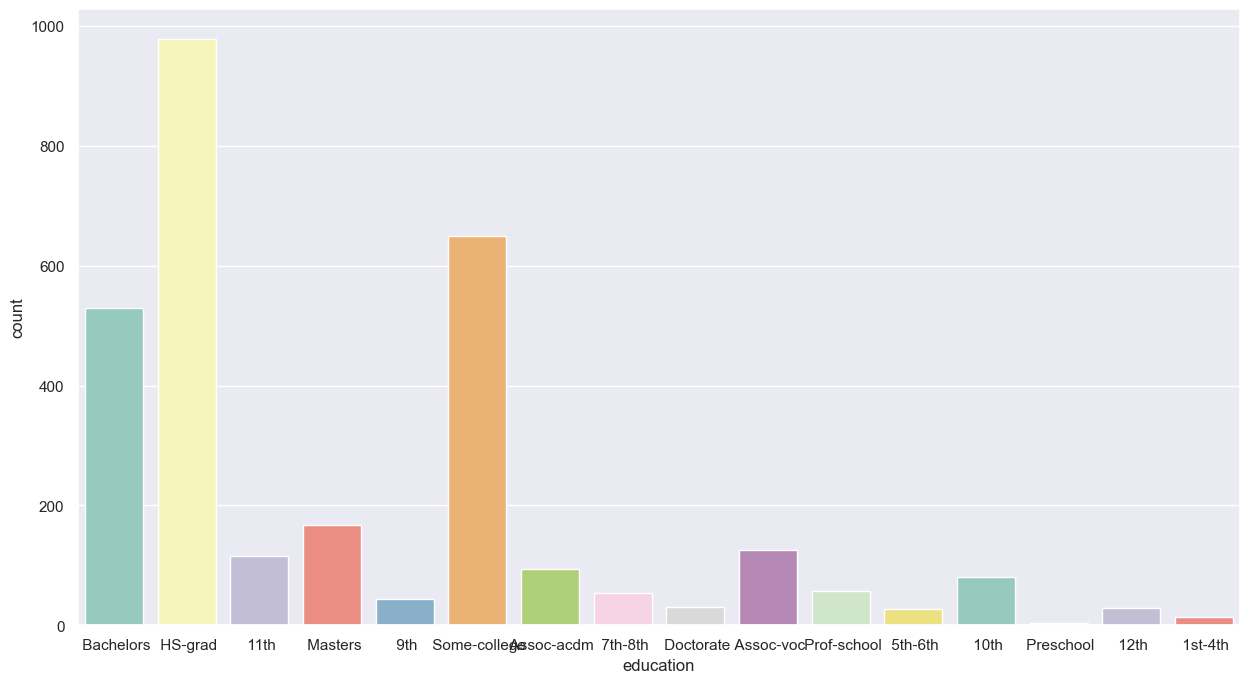

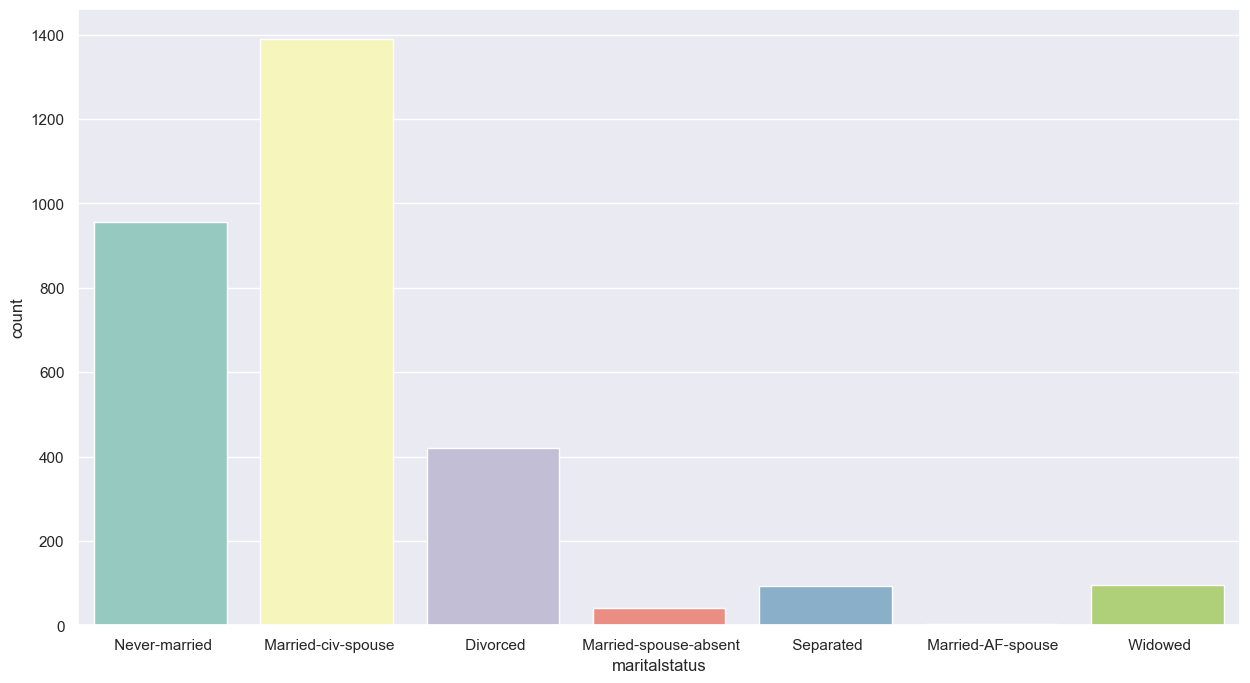

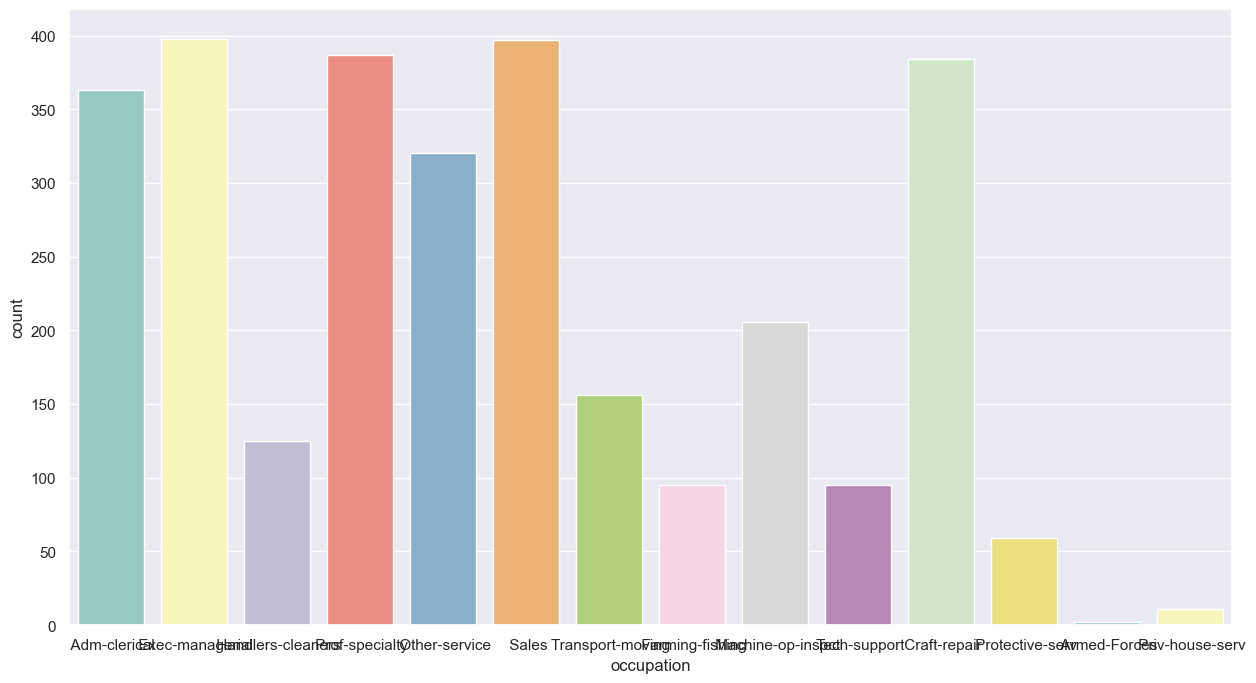

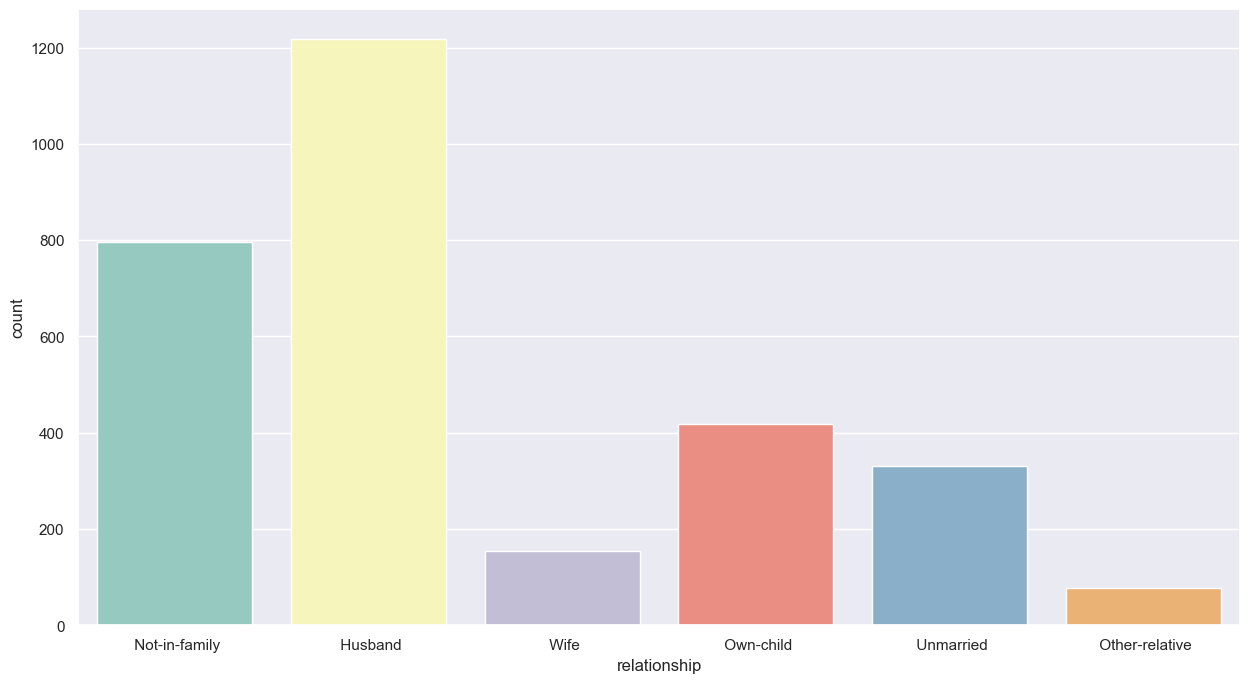

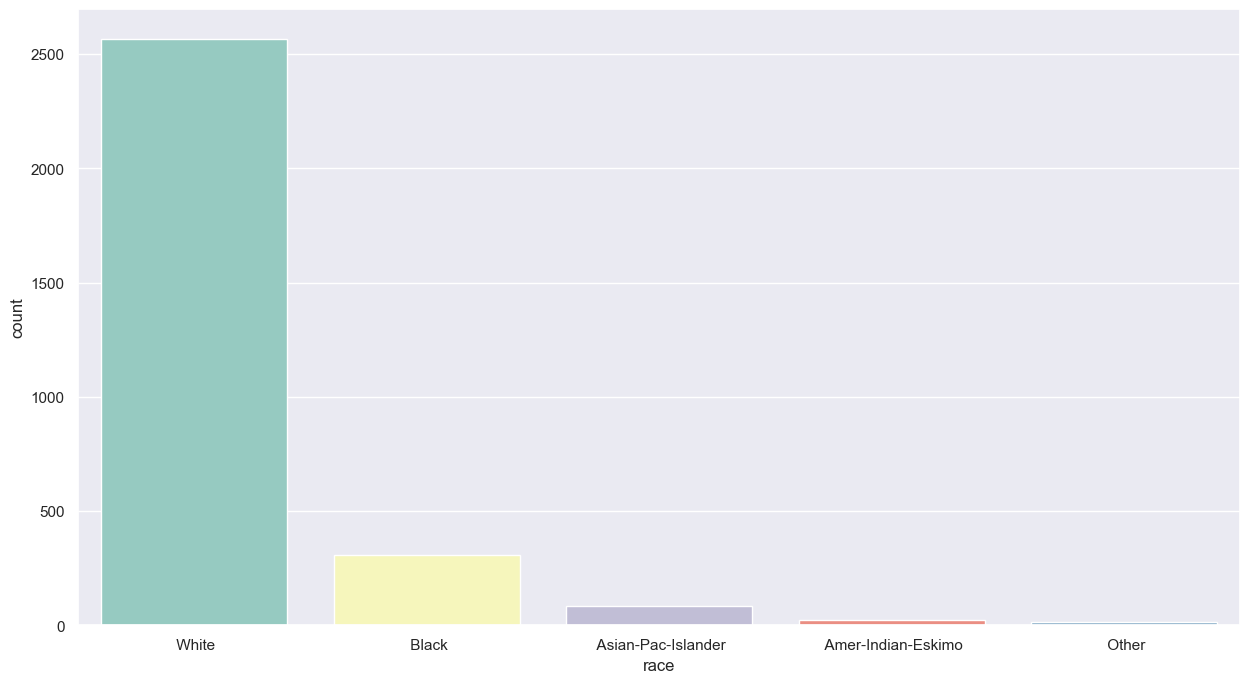

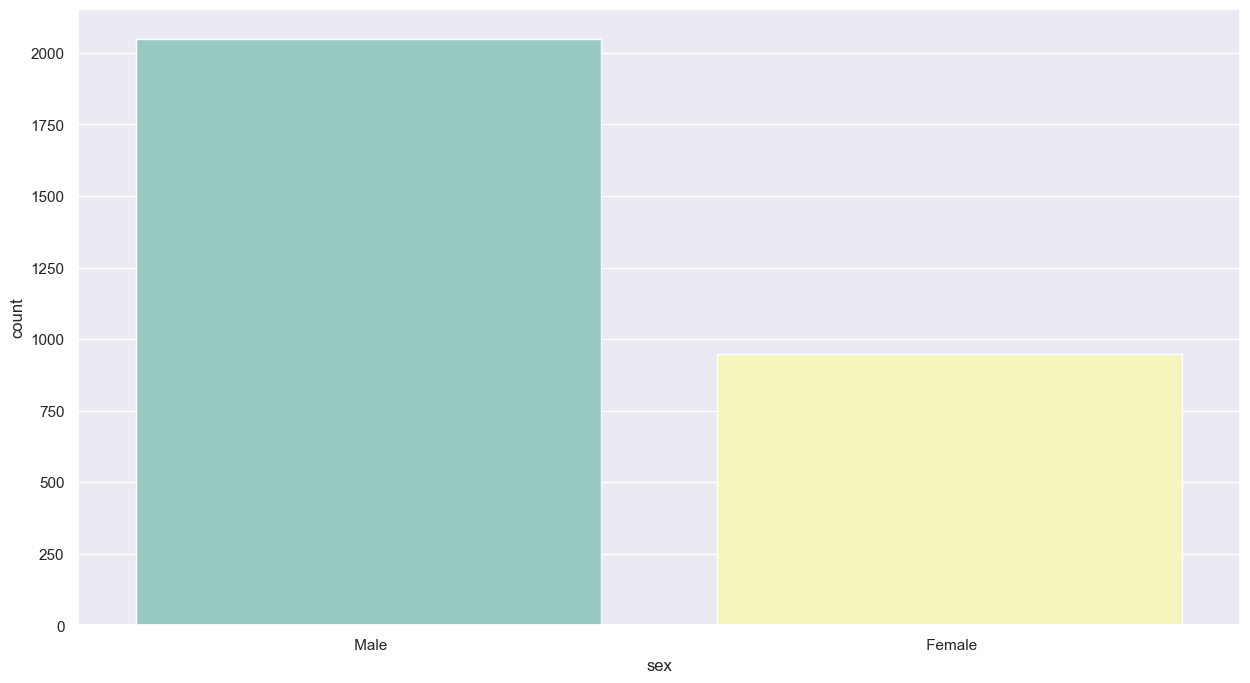

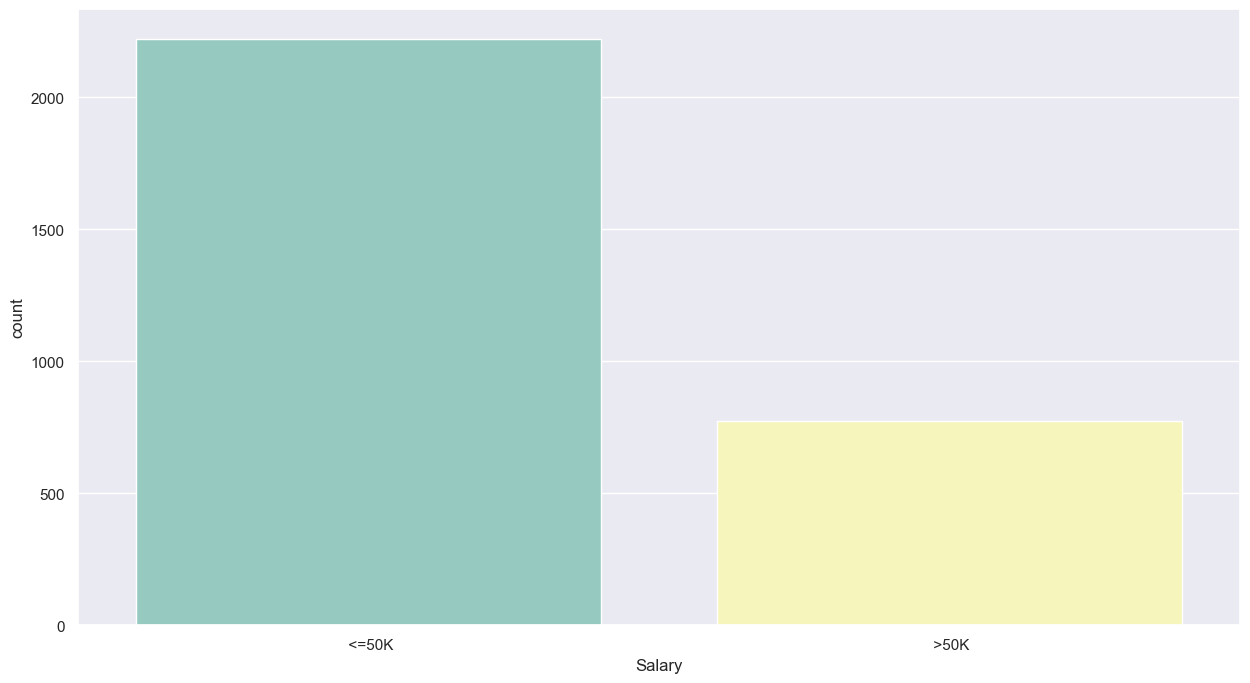

In [50]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})
cat_col = ['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex','Salary']
for col in cat_col:
    plt.figure() #this creates a new figure on which your plot will appear
    sns.countplot(x = col, data = train_data, palette = 'Set3');

In [51]:
print('workclass',train_data.workclass.unique())
print('education',train_data.education.unique())
print('maritalstatus',train_data['maritalstatus'].unique())
print('occupation',train_data.occupation.unique())
print('relationship',train_data.relationship.unique())
print('race',train_data.race.unique())
print('sex',train_data.sex.unique())
print('native',train_data['native'].unique())
print('Salary',train_data.Salary.unique())

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
maritalstatus [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']
relationship [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex [' Male' ' Female']
native [' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras

In [52]:
train_data[['Salary', 'age']].groupby(['Salary'], as_index=False).mean().sort_values(by='age', ascending=False)

,Salary,age
1,>50K,43.940568
0,<=50K,36.968511


C:\Users\prasa\AppData\Local\Temp\ipykernel_2140\3721753230.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


<Axes: xlabel='race', ylabel='prop'>

<Figure size 2000x500 with 0 Axes>

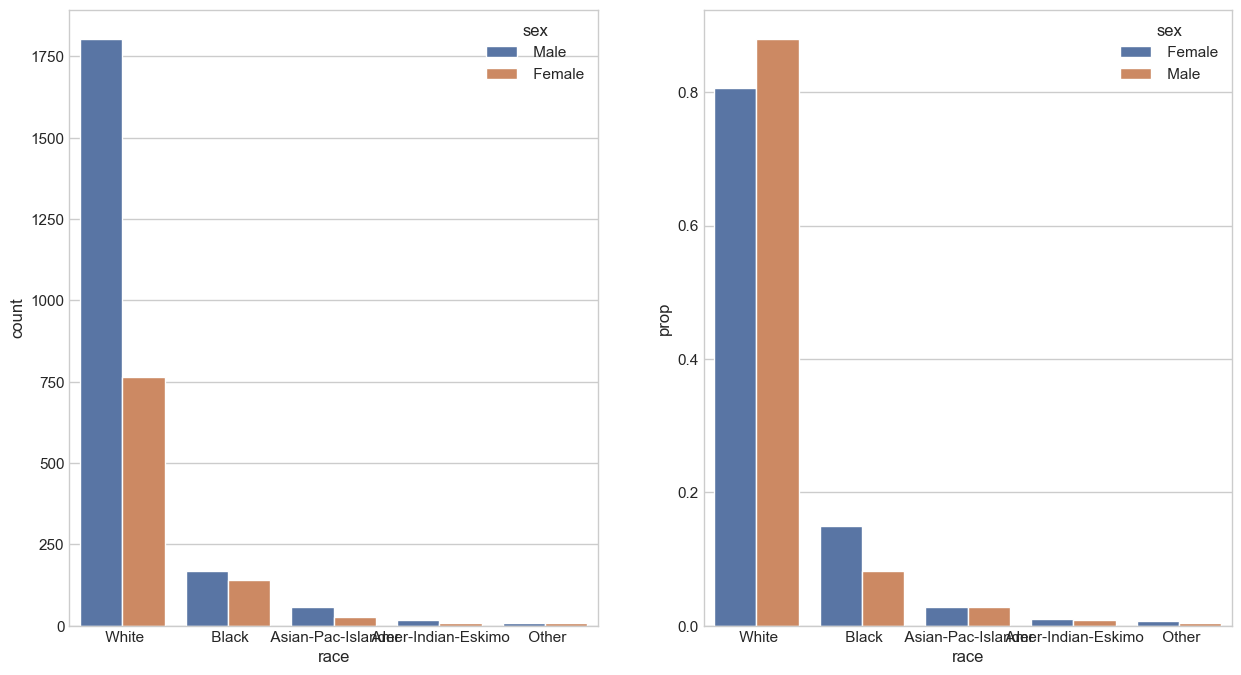

In [53]:
plt.style.use('seaborn-whitegrid')
x, y, hue = "race", "prop", "sex"
#hue_order = ["Male", "Female"]
plt.figure(figsize=(20,5)) 
f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=train_data, ax=axes[0])

prop_df = (train_data[x]
           .groupby(train_data[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])

#### Feature encoding

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
train_data = train_data.apply(LabelEncoder().fit_transform)
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,11,0,35,37,0
1,33,4,9,12,2,3,0,4,1,0,0,11,37,0
2,21,2,11,8,0,5,1,4,1,0,0,35,37,0
3,36,2,1,6,2,5,0,2,1,0,0,35,37,0
4,11,2,9,12,2,9,5,2,0,0,0,35,4,0


In [56]:
test_data = test_data.apply(LabelEncoder().fit_transform)
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


In [57]:
drop_elements = ['education', 'native', 'Salary']
X = train_data.drop(drop_elements, axis=1)

In [58]:
y = train_data['Salary']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [60]:
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB
classifier_mb = MB()
classifier_mb.fit(X_train, y_train)


MultinomialNB()

In [61]:
score_multinomial = classifier_mb.score(X_test,y_test)
print('The accuracy of Gaussian Naive Bayes is', score_multinomial)

The accuracy of Gaussian Naive Bayes is 0.7818181818181819


In [62]:
from sklearn import metrics

drop_elements = ['education', 'native', 'Salary']
X_new = test_data.drop(drop_elements, axis=1)

y_new = test_data['Salary']

In [63]:
new_prediction = classifier_mb.predict(X_new)
print(metrics.classification_report(y_new, new_prediction))
print(metrics.confusion_matrix(y_new, new_prediction))
print("Accuracy:",metrics.accuracy_score(y_new, new_prediction))
print("Precision:",metrics.precision_score(y_new, new_prediction))
print("Recall:",metrics.recall_score(y_new, new_prediction))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86     11360
           1       0.60      0.31      0.41      3700

    accuracy                           0.78     15060
   macro avg       0.70      0.62      0.64     15060
weighted avg       0.75      0.78      0.75     15060

[[10590   770]
 [ 2559  1141]]
Accuracy: 0.7789508632138115
Precision: 0.5970695970695971
Recall: 0.3083783783783784


In [64]:
# Gaussian Naive Bayes
classifier_gb = GB()
classifier_gb.fit(X_train, y_train)

GaussianNB()

In [65]:
score_gaussian = classifier_gb.score(X_test,y_test)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian)

The accuracy of Gaussian Naive Bayes is 0.803030303030303


In [66]:
new_prediction = classifier_gb.predict(X_new)
print(metrics.classification_report(y_new, new_prediction))
print(metrics.confusion_matrix(y_new, new_prediction))
print("Accuracy:",metrics.accuracy_score(y_new, new_prediction))
print("Precision:",metrics.precision_score(y_new, new_prediction))
print("Recall:",metrics.recall_score(y_new, new_prediction))

              precision    recall  f1-score   support

           0       0.85      0.91      0.87     11360
           1       0.63      0.49      0.55      3700

    accuracy                           0.80     15060
   macro avg       0.74      0.70      0.71     15060
weighted avg       0.79      0.80      0.80     15060

[[10297  1063]
 [ 1881  1819]]
Accuracy: 0.8045152722443559
Precision: 0.6311589174184594
Recall: 0.4916216216216216
